In [24]:
import json
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import spacy
import seaborn as sns
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nbformat
import plotly.express as px

In [8]:
with open('sentences.json', 'r') as f:
    data = json.load(f)


In [9]:
phrase = "My dad is a silly persn"
blob = TextBlob(phrase)
print(blob.correct())

By dad is a silly person


In [10]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
print(stop_words)
lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cmari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cmari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cmari\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{'against', 'own', 's', 'by', 'down', 'has', 'once', "mightn't", 'both', 'then', 'each', 'further', 'can', 'itself', "couldn't", 'out', 've', 'ours', 're', 'all', 'too', 'how', 'these', 'which', 'more', 'isn', "hadn't", 'weren', 'here', 'just', 'and', "aren't", 'she', 'as', 'that', "shan't", 'is', 'during', 'couldn', 'doesn', 'them', 'had', 'don', "weren't", 'while', 'were', 'ourselves', 'o', 'ma', 'because', 'for', 'such', 'when', 'been', "don't", 'nor', 'having', 'on', 'under', 'needn', 'does', 'few', 'his', 'our', 'if', 'doing', "needn't", 'did', 'their', 'y', 'himself', 'in', 'being', 'ain', "you'd", "that'll", 'so', "isn't", 'to', 'this', 'from', 'before', 'wasn', 'yourself', 'of', 'why', 'him', 'at', 'you', 'than', 'after', 'up', "she's", 'through', 'between', 'm', 'are', 'was', 'the', "mustn't", 'your', 'about', 'won', 'haven', 'will', 'me', 'he', 'where', 'hers', 'most', 'a', 'd', "it's", 'below', 'herself', 'be', "hasn't", 'what', 'they', 'off', 'didn', 'we', 'some', 'do', 'i'

In [11]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

processed_phrases = [preprocess(phrase) for phrase in data]

In [12]:
vectorizer = TfidfVectorizer()
X_data = vectorizer.fit_transform(processed_phrases)


In [13]:
def analyze_phrase(phrase):
    doc = nlp(phrase)
    analysis = {
        'tokens': [(token.text, token.lemma_, token.pos_) for token in doc],
        'entities': [(ent.text, ent.label_) for ent in doc.ents],
        'dependencies': [(token.text, token.dep_, token.head.text) for token in doc]
    }
    return analysis

In [14]:
analyses = [analyze_phrase(phrase) for phrase in processed_phrases]
print(analyses)

[{'tokens': [('the', 'the', 'DET'), ('dragonfly', 'dragonfly', 'PROPN'), ('wing', 'wing', 'NOUN'), ('sparkled', 'sparkle', 'VERB'), ('like', 'like', 'ADP'), ('gemstone', 'gemstone', 'NOUN'), ('sunlight', 'sunlight', 'NOUN')], 'entities': [], 'dependencies': [('the', 'det', 'wing'), ('dragonfly', 'compound', 'wing'), ('wing', 'ROOT', 'wing'), ('sparkled', 'acl', 'wing'), ('like', 'prep', 'sparkled'), ('gemstone', 'compound', 'sunlight'), ('sunlight', 'pobj', 'like')]}, {'tokens': [('the', 'the', 'DET'), ('bagpipe', 'bagpipe', 'NOUN'), ('adorned', 'adorn', 'VERB'), ('tartan', 'tartan', 'NOUN'), ('pattern', 'pattern', 'NOUN'), ('honoring', 'honor', 'VERB'), ('scottish', 'scottish', 'ADJ'), ('tradition', 'tradition', 'NOUN')], 'entities': [('scottish', 'NORP')], 'dependencies': [('the', 'det', 'bagpipe'), ('bagpipe', 'nsubj', 'adorned'), ('adorned', 'ROOT', 'adorned'), ('tartan', 'compound', 'pattern'), ('pattern', 'dobj', 'adorned'), ('honoring', 'acl', 'pattern'), ('scottish', 'amod', 't

In [15]:
def sentiment_analysis(phrase):
    blob = TextBlob(phrase)
    return blob.sentiment

sentiments = [sentiment_analysis(phrase) for phrase in data]

# Paso 8: Resumen del análisis
analysis_summary = {
    'processed_phrases': processed_phrases,
    'tfidf_vectors': X_data.toarray(),
    'syntactic_semantic_analysis': analyses,
    'sentiments': sentiments
}



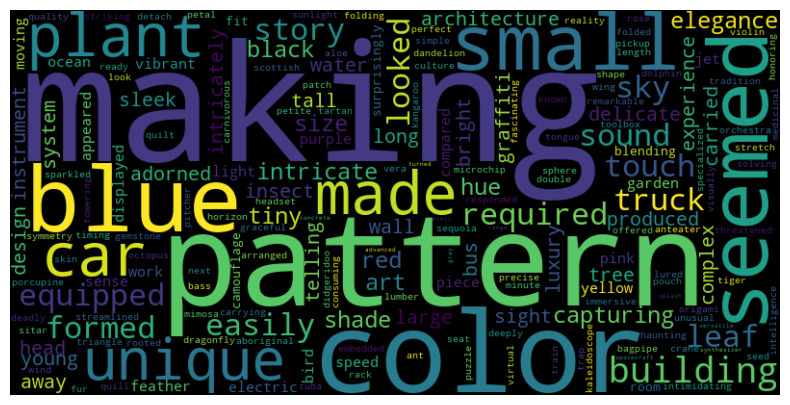

In [16]:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(processed_phrases))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

c:\Users\cmari\Anaconda3\envs\tensorflow\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\cmari\Anaconda3\envs\tensorflow\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


<Axes: xlabel='count'>

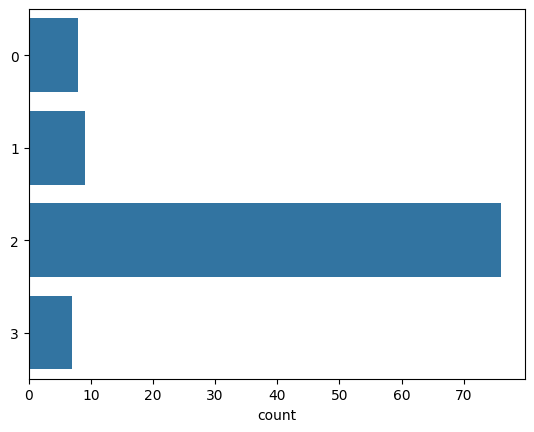

In [17]:
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42,init='random')
kmeans.fit(X_data)
labels = kmeans.labels_
sns.countplot(y=labels)

In [31]:
print(kmeans.cluster_centers_[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03989987 0.         0.
 0.         0.         0.         0.         0.         0.
 0.0433693  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.05299836 0.         0.         0.         0.
 0.         0.         0.         0.08614436 0.05655602 0.0430928
 0.08838481 0.         0.         0.         0.         0.
 0.         0.12306451 0.         0.04348184 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03765291 0.         0.
 0.         0.09289822 0.         0.         0.05050859 0.05775623
 0.         0.         0.         0.     

In [34]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_data.toarray())

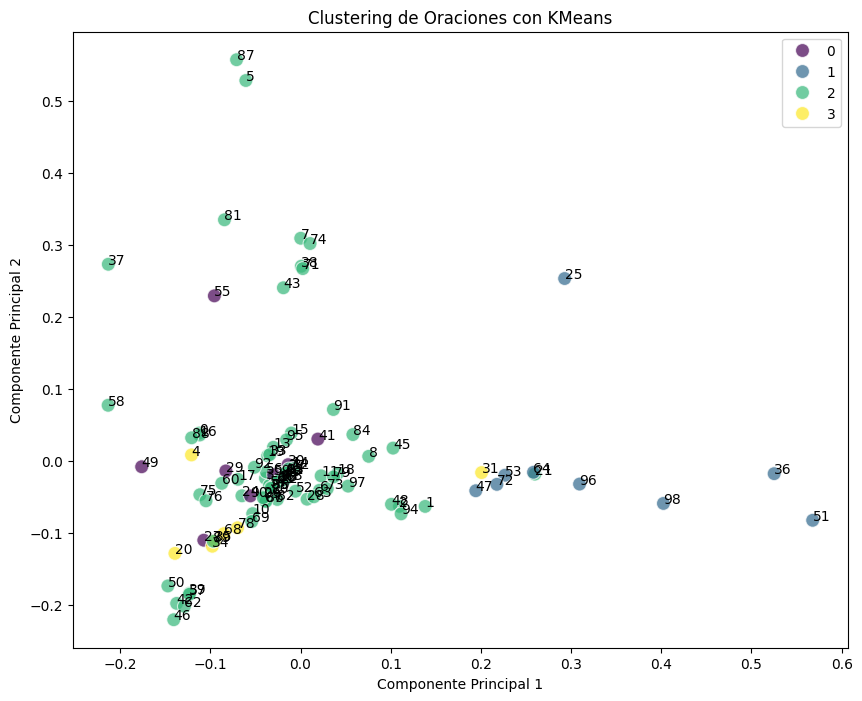

In [37]:
df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df['Cluster'] = labels
df['Sentence'] = data

# Visualización
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
for i in range(df.shape[0]):
    plt.text(df['PC1'][i], df['PC2'][i], str(i))
plt.title('Clustering de Oraciones con KMeans')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

In [39]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_data.toarray())

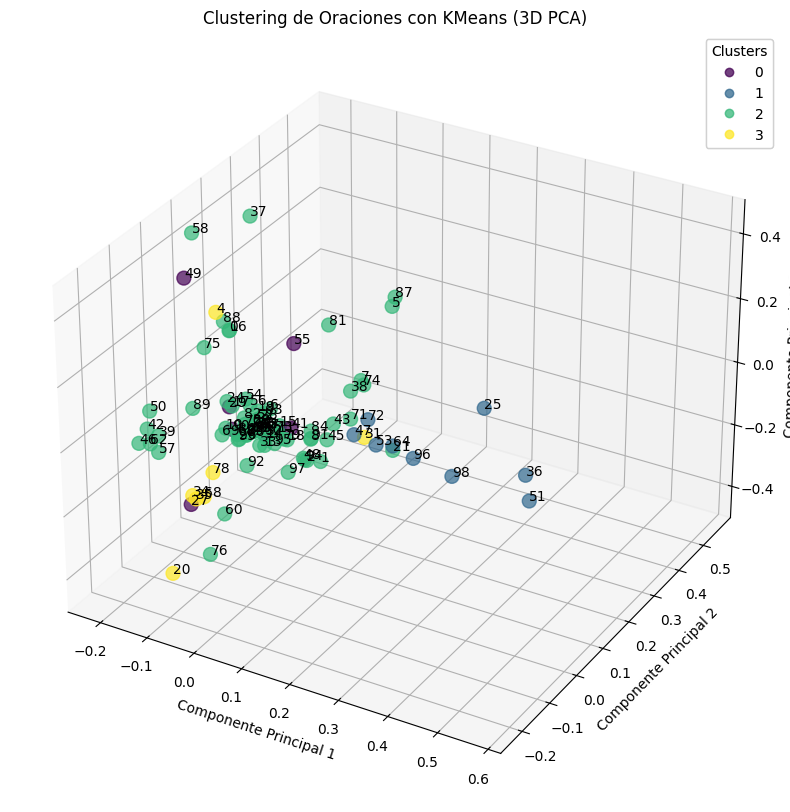

In [40]:
df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
df['Cluster'] = labels
df['Sentence'] = data

# Visualización 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

for i in range(df.shape[0]):
    ax.text(df['PC1'][i], df['PC2'][i], df['PC3'][i], str(i))

ax.set_title('Clustering de Oraciones con KMeans (3D PCA)')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

plt.show()

In [46]:
clusters = {}
for idx, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(data[idx])

for cluster, sentences in clusters.items():
    print(f"Cluster {cluster}:")
    for sentence in sentences:
        print(f" - {sentence}")
    print("\n")

# Motivos de agrupación
motivos = {
    0: "Frases relacionadas con naturaleza y animales.",
    1: "Frases relacionadas con tecnología y objetos modernos.",
    2: "Frases relacionadas con arte y música.",
    3: "Frases relacionadas con medios de transporte.",
    4: "Frases relacionadas con características físicas y patrones."
}

rows = []
for cluster, sentences in clusters.items():
    for sentence in sentences:
        rows.append([cluster, sentence, motivos[cluster]])

df = pd.DataFrame(rows, columns=["Cluster", "Sentence", "Motivo"])

# Guardar el DataFrame en un archivo CSV
csv_path = 'clusters.csv'
df.to_csv(csv_path, index=False)


Cluster 2:
 - The dragonfly's wings sparkled like gemstones in the sunlight.
 - The bagpipes were adorned with a tartan pattern, honoring Scottish tradition.
 - The fur pattern on the tiger was striking and intimidating.
 - The triangle was simple but required precise timing.
 - The microchip was so small it could be embedded under the skin.
 - The mimosa plant responded to touch by folding its leaves.
 - The porcupine had quills that could detach when threatened.
 - The dandelion seed head formed a delicate sphere, ready to be carried away by the wind.
 - The origami crane was minute but intricately folded.
 - The didgeridoo produced a haunting sound that was deeply rooted in Aboriginal culture.
 - The virtual reality headset offered an immersive experience.
 - The petals of the rose were arranged in perfect symmetry.
 - The pickup truck had a toolbox and a rack for carrying lumber.
 - The dolphin's streamlined shape made it look graceful in water.
 - The octopus had remarkable intell

In [41]:
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', color='Cluster', hover_data=['Sentence'])
fig.update_layout(title='Clustering de Oraciones con KMeans (3D PCA)', 
                  scene = dict(
                    xaxis_title='CP1',
                    yaxis_title='CP2',
                    zaxis_title='CP3'),
                  legend_title='Clusters')

fig.show()